### K means clustering

In [41]:
#importing modules to be used
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
#reading in the data
data = pd.read_csv('iris.csv')

In [12]:
iris_data = datasets.load_iris()

In [13]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
data.sample(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
137,138,6.4,3.1,5.5,1.8,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
107,108,7.3,2.9,6.3,1.8,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa


In [22]:
data.rename(columns = {'SepalLengthCm': 'SepalLength(cm)', 'SepalWidthCm': 'SepalWidth(cm)',
             'PetalLengthCm': 'PetalLength(cm)', 'PetalWidthCm': 'PetalWidth(cm)'}, inplace=True)

In [23]:
data.sample()

,Id,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
113,114,5.7,2.5,5.0,2.0,Iris-virginica


In [66]:
#Finding the optimum number of clusters for k-means classification
x = data.iloc[:, 0:4].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [67]:
#wcss- within cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans_model = KMeans(n_clusters = i, init="k-means++", n_init = 7, max_iter = 300)
    kmeans_model.fit(x)
    wcss.append(kmeans_model.inertia_)

C:\Users\clinton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


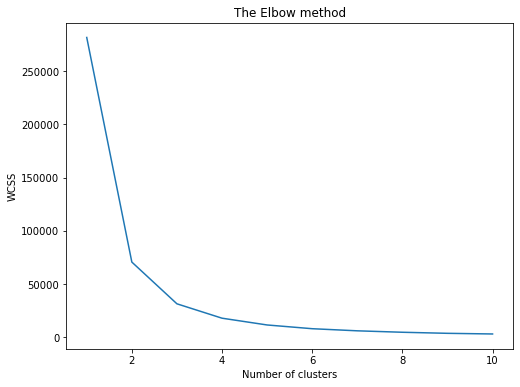

In [68]:
#Visualizing the k-means Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

> Note: Elbow method - The elbow method describes the sharp increase in the ratio of accuracy after multiple clustering runs and an increase in K(clusters) in each run..
Looking closely at the visualization above, we can observe that the elbow curve becomes significant from point '3'.
From this, we will choose the number of clusters as **3**

In [69]:
#building the model with n_clusters set to 3
model = KMeans(n_clusters = 3, init='k-means++', n_init= 10, max_iter=300)
model.fit(x)

KMeans(n_clusters=3)

In [70]:
kmeans_pred = model.predict(x)

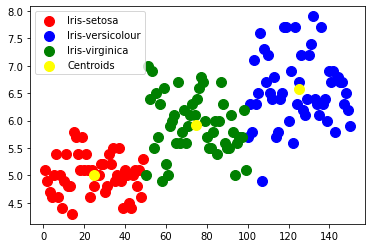

In [79]:
#Visualizing the clusters
plt.scatter(x[kmeans_pred == 0, 0], x[kmeans_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmeans_pred == 1, 0], x[kmeans_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmeans_pred == 2, 0], x[kmeans_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = s'yellow', label = 'Centroids')

plt.legend()